# **Week 13: 2D Ising Model with Monte Carlo Metropolis Algorithm**

<br>

In this exercise, we explore the properties of a 2D Ising model using the Monte Carlo Metropolis algorithm. The Ising model is a powerful tool, providing important insights about the behaviour of magnetic systems, enabling the study of behaviours like phase transitions.

<br>


> ### **Introduction: 2D Ising Model**


<br>


The 2D Ising model is a mathematical representation of a system composed of discrete magnetic spins arranged on a lattice. Each spin can take one of two possible values, typically denoted as up ($+1$) or down ($-1$). The interaction between neighboring spins contributes to the overall energy of the system. The fundamental Hamiltonian for the 2D Ising model is given by:


$$ H = -J \sum_{\langle i, j \rangle} s_i s_j  \tag{Equation 1.} $$


Here:
- $ J $ is the coupling constant representing the strength of interactions.
- $ \langle i, j \rangle $ denotes summation over neighboring spins.
- $ s_i $ and $ s_j $ are the spins at lattice sites $ i $ and $ j $ respectively.

The Metropolis algorithm is employed to perform Monte Carlo simulations and explore the system's equilibrium configurations at different temperatures.


<br>


> ### **Introduction: Monte Carlo Metropolis Algorithm**


The Monte Carlo Metropolis algorithm is a computational technique used to simulate the evolution of physical systems in thermal equilibrium. In the context of the 2D Ising model, this algorithm provides a systematic approach to generate statistically representative configurations of the spin system at various temperatures.

The key steps of the algorithm include:
1. Randomly selecting a lattice site and flipping the spin.
2. Evaluating the change in energy associated with the spin flip.
3. Accepting or rejecting the spin flip based on the Metropolis criterion.

The Metropolis criterion is expressed by the equation:

$$ \Delta E = E_{\text{new}} - E_{\text{old}} \leq 0 \text{ or } e^{-\frac{\Delta E}{T}} \geq \text{random}(0, 1) \tag{Equation 2.} $$

Here:
- $ \Delta E $ is the change in energy.
- $ E_{\text{new}} $ and $ E_{\text{old}} $ are the energies of the system with the new and old configurations, respectively.
- $ T $ is the temperature.

This ensures that configurations leading to a lower energy state are accepted, while those with higher energy have a probability of acceptance determined by the Boltzmann factor.

Iteratively applying these steps leads to the exploration of the configuration space and the generation of an ensemble of configurations representative of the system at equilibrium.


<br>


> ### **Introduction: Thermodynamic Observables**


In the study of the 2D Ising model, various thermodynamic observables, such as magnetization, can be computed from the ensemble of configurations generated by the Monte Carlo simulations. The analysis of these observables allows us to characterize phase transitions.

<br>

<br>

<br>


# **Task 1**

In this task, you will implement three functions to calculate the total energy, magnetization per spin, and the sum of nearest neighbors for a given spin configuration. 

1. **Implement the function `calculate_configuration_energy`**:
    - This function takes two parameters: `spins`, a 2D array representing the spin configuration, and `J`, the coupling constant (default value is 1).
    - The function should calculate and return the total energy of the system based on the Ising model.
    - The total energy is calculated using the formula provided in the docstring.

</br>

2. **Implement the function `calculate_configuration_magnetization`**:
    - This function takes one parameter: `spins`, a 2D array representing the spin configuration.
    - The function should calculate and return the magnetization per spin of the system based on the Ising model.
    - The magnetization per spin is the sum of all spins divided by the total number of spins.

</br>

3. **Implement the function `calculate_neighbors_sum`**:
    - This function takes three parameters: `spins`, a 2D array representing the spin configuration, and `i` and `j`, the indices of the spin.
    - The function should calculate and return the sum of nearest neighbors for the given spin in the Ising model.
    - Use periodic boundary conditions for the edge spins.

</br>


> Note: Make use of these functions as you work through the exercise.


In [97]:
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [98]:
%matplotlib inline
def calculate_configuration_energy(spins, j=1):
    energy = 0
    for idx1, val1 in enumerate(spins):
        for idx2, val2 in enumerate(spins[0]):
            energy += -j * spins[idx1, idx2] * (spins[(idx1 + 1) % len(spins), idx2] + spins[idx1, (idx2 + 1) % len(spins[0])])
    return energy

def calculate_configuration_magnetization(spins):
    return np.sum(spins) / len(spins)

def calculate_neighbors_sum(spins, idx1, idx2):
    rows, cols = spins.shape
    neighbors_sum = (spins[(idx1 - 1) % rows, idx2] + spins[(idx1 + 1) % rows, idx2] + spins[idx1, (idx2 - 1) % cols] + spins[idx1, (idx2 + 1) % cols])
    return neighbors_sum

# **Task 2**

In this task, you will implement two functions. One to initialize a square spin lattice, and one implementing the Metropolis algorithm to be applied to a spin configuration.


1. **Implement the function `initialize_spin_configuration`**:
    - This function takes one parameter: `size`, the size of the square lattice.
    - The function should return a 2D array representing a random spin configuration of the specified size. Spins can be either -1 or 1.

</br>

2. **Implement the function `metropolis_algorithm`**:
    - This function takes four parameters: `spins` (spin configuration), `temperature` (temperature of the system), `num_steps` (number of Monte Carlo steps to perform), and `J` (coupling constant, default value is 1).
    - The function should perform a Monte Carlo simulation using the Metropolis algorithm to optimize the spin configuration.
    - For each Monte Carlo step:
        - Randomly choose a spin to flip (index `i, j`).
        - Calculate the change in energy (`delta_energy`) due to flipping the chosen spin.
        - Apply the Metropolis acceptance criterion:
            - If `delta_energy` is negative, accept the flip.
            - If `delta_energy` is positive, accept the flip with a probability of `exp(-beta * delta_energy)`, where `beta = 1 / temperature`.
        - Update the spin configuration based on the acceptance criterion.
        - Calculate the total energy and magnetization per spin for the updated configuration and store these values in lists.
    - Return the updated spin configuration, a list of energy values during the simulation, and a list of magnetization per spin values during the simulation.

</br>

3. **Explore a range of temperatures**:
    - Define a range of temperatures between 0.1 and 6.
    - For each temperature in the range:
        - Initialize a random spin configuration using the `initialize_spin_configuration` function.
        - Use the `metropolis_algorithm` function to perform a Monte Carlo simulation with a specified number of steps.
        - Plot the final magnetization per spin for each temperature.
    - Analyze the plot to identify the transition temperature in the Ising model, where a phase transition occurs.
  
> Note: in the remaining tasks (this one included), make use of a square spin lattices with dimensions of 10 by 10 spins, and make sure the algorithm is run for a large enough number of steps (feel free to use the recommended number of 20000 steps).

In [99]:
def initialize_spin_configuration(size):
    initial_spins = np.random.choice([1, -1], size=(size, size))
    return initial_spins

def metropolis_algorithm(spins, temperature, num_steps, j=1):
    energy_values = []
    magnetization_values = []
    
    for step in range(num_steps):
        idx1, idx2 = np.random.randint(0, spins.shape[0]) - 1, np.random.randint(0, spins.shape[0]) - 1
        spins[idx1, idx2] *= -1
        
        delta_energy = 2 * j * spins[idx1, idx2] * calculate_neighbors_sum(spins, idx1, idx2)
        if delta_energy <= 0 or np.random.uniform(0, 1) < np.exp(-delta_energy / temperature):
            pass
        else:
            #  Rejecting the spin flip
            spins[idx1, idx2] *= -1
        
        energy = calculate_configuration_energy(spins, j = 1)
        magnetization = calculate_configuration_magnetization(spins)

        energy_values.append(energy)
        magnetization_values.append(magnetization)
        
    return energy_values, magnetization_values, spins

Text(0.5, 1.0, 'Ising Model Phase Transition')

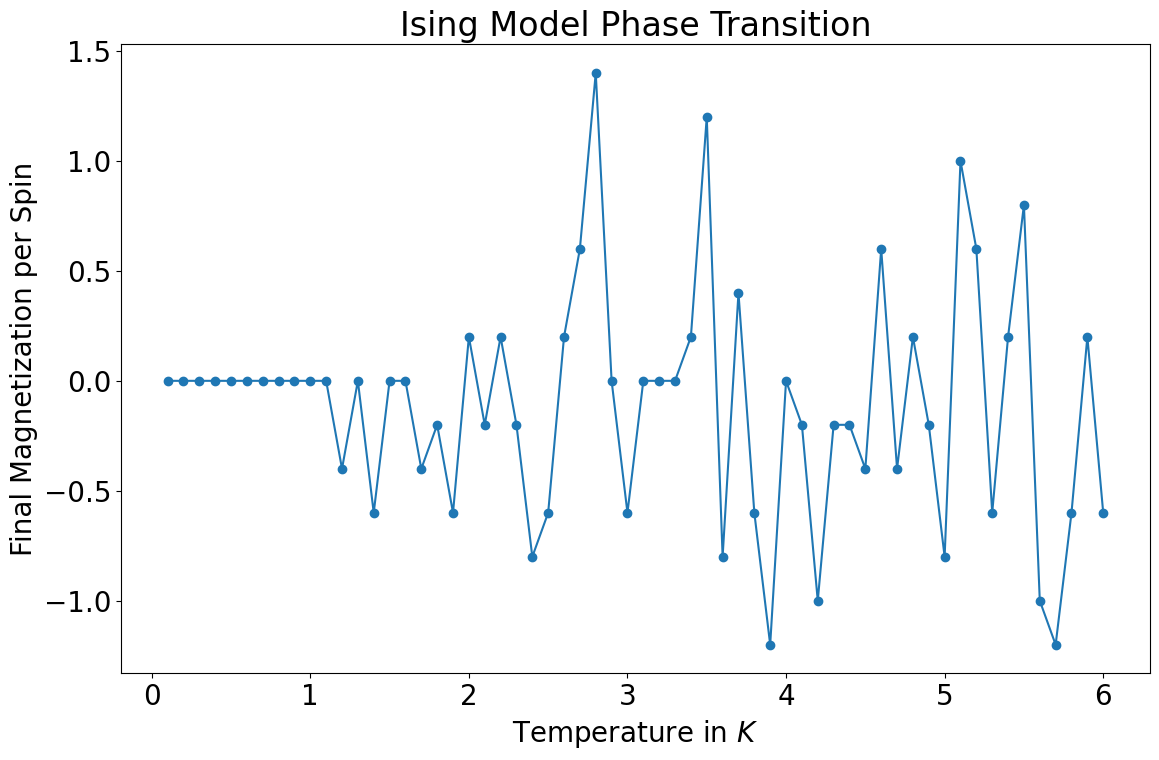

In [100]:
temperatures = np.arange(0.1, 6.1, 0.1)
final_magnetizations = []

for temperature in temperatures:
    spins = initialize_spin_configuration(size=10)
    _, magnetization_values, _ = metropolis_algorithm(spins, temperature, num_steps=2000)
    #  Essentially the same as
    #  magnetization_values = metropolis_algorithm(spins, temperature, num_steps=1000)[1]
    final_magnetizations.append(magnetization_values[-1])

fig, ax = plt.subplots(nrows=1, ncols=1, tight_layout=True, figsize=(12,8))
font_params = {
    'font.family': 'sans-serif',
    'font.serif': 'Helvetica',
    'font.size': 20,
    'font.weight': 'normal',
}
plt.rcParams.update(font_params)

ax.plot(temperatures, final_magnetizations, marker='o')
ax.set_xlabel(r"Temperature in $K$", labelpad=5)
ax.set_ylabel("Final Magnetization per Spin")
ax.set_title("Ising Model Phase Transition")

# **Task 3**


1. **Explore temperatures above and below the transition temperature**:
    - Choose two temperatures, one above and one below the estimated transition temperature (based on Task 2).
    - For each chosen temperature:
        - Initialize a random spin configuration using the `initialize_spin_configuration` function.
        - Use the `metropolis_algorithm` function to perform a Monte Carlo simulation with a specified number of steps.
        - Plot the evolution of energy and magnetization per spin over the course of the simulation.
        - Visualize the initial and final spin configurations.


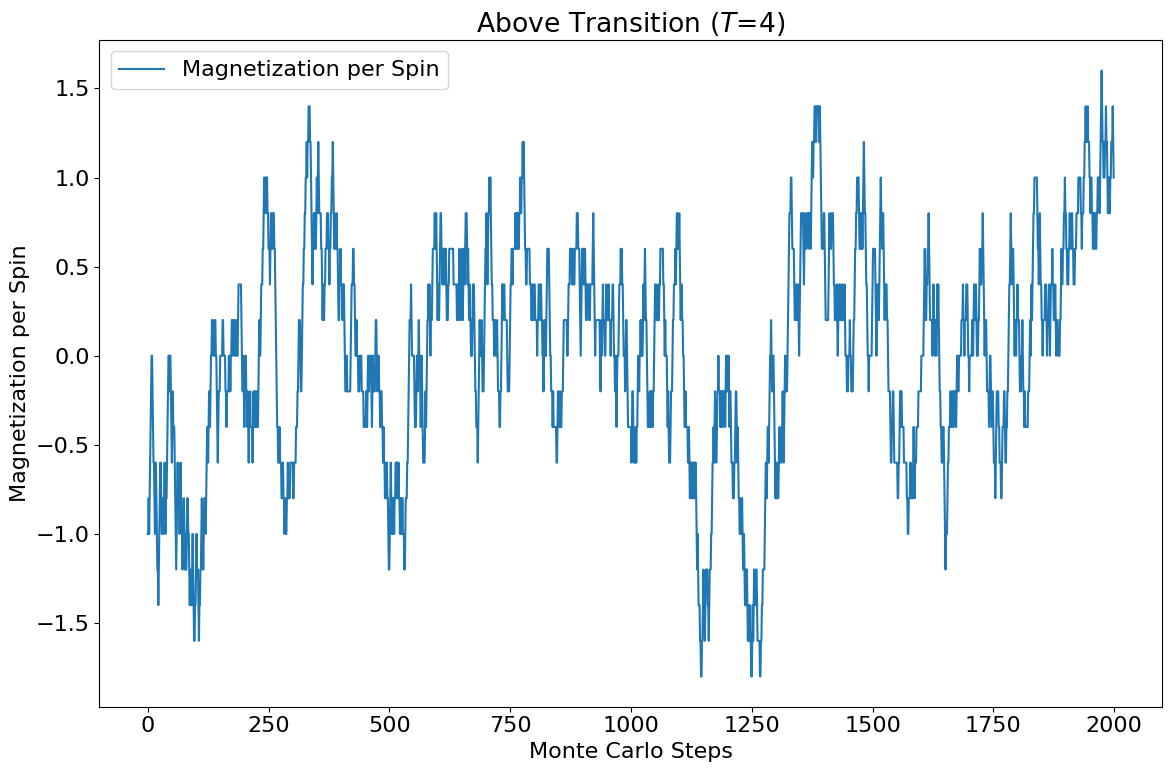

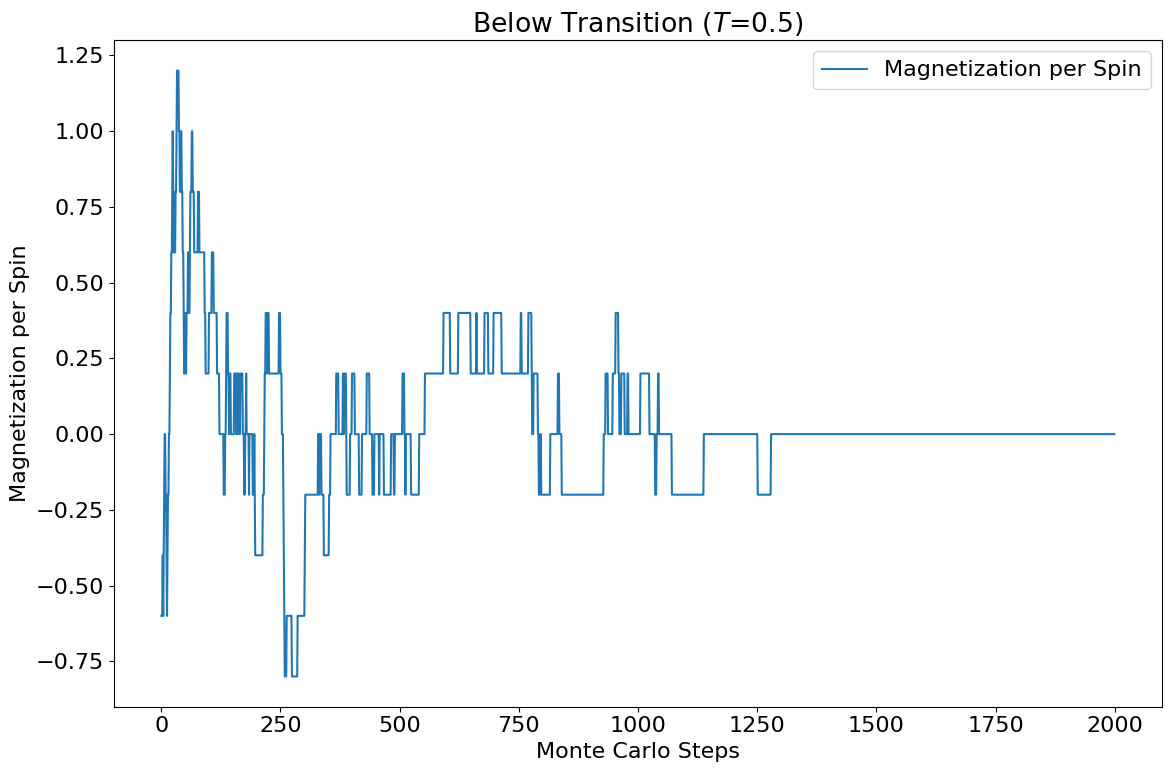

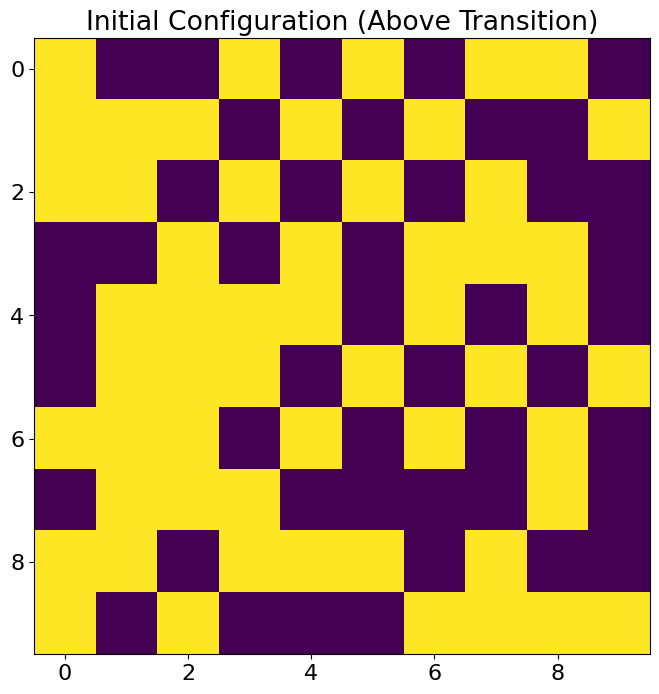

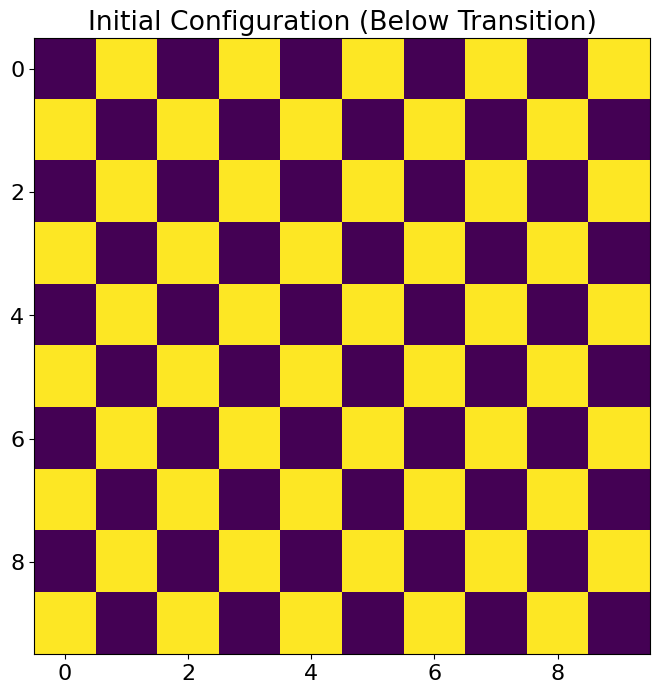

In [121]:
def plot(magnetization_values, title):
    plt.subplots(nrows=1, ncols=1, tight_layout=True, figsize=(12,8))
    plt.plot(magnetization_values, label="Magnetization per Spin")
    plt.title(title)
    plt.xlabel("Monte Carlo Steps")
    plt.ylabel("Magnetization per Spin")
    plt.legend()
    plt.show()
    
def visualize_spin_configurations(spins, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(spins, cmap='viridis', interpolation='nearest')
    plt.title(title)
    plt.show()
    
def eval_temperature(above_transition, below_transition, num_steps):
    spins_above = initialize_spin_configuration(size=10)
    spins_below = initialize_spin_configuration(size=10)
    
    _, magnetization_values_above, _ = metropolis_algorithm(spins_above, above_transition, num_steps)
    _, magnetization_values_below, _ = metropolis_algorithm(spins_below, below_transition, num_steps)
    
    plot(magnetization_values_above, title=f"Above Transition ($T$={above_transition})")
    plot(magnetization_values_below, title=f"Below Transition ($T$={below_transition})")
    visualize_spin_configurations(spins_above, title="Initial Configuration (Above Transition)")
    visualize_spin_configurations(spins_below, title="Initial Configuration (Below Transition)")

eval_temperature(above_transition=4, below_transition=0.5, num_steps=2000)

font_params = {
    'font.family': 'sans-serif',
    'font.serif': 'Helvetica',
    'font.size': 16,
    'font.weight': 'normal',
}
plt.rcParams.update(font_params)